In [ ]:
# Programming done by @SyedMohiuddinZia:
# Name: SYED MOHIUDDIN ZIA,  Mobile: 0092 307 2099300
# Nationality: Pakistan,     Birth: January 15 1996

In [44]:
# A. Develop a program in any convenient programming language or computational environment
# (Python, MATLAB etc.) that can be used to:

print("[S_xx, S_xy, S_zx] | [120, 50, 30]  |  [120, -55, -75]")
print("[S_xy, S_yy, S_yz] | [50,  80, 20]  |  [-55,  55,  33]")
print("[S_zx, S_yz, S_zz] | [30,  20, 10]  |  [-75,  33, -85]")
print()
print("----------------")
S_xx = int(input("Enter S_xx: "))
S_yy = int(input("Enter S_yy: "))
S_zz = int(input("Enter S_zz: "))
S_xy = int(input("Enter S_xy: "))
S_yz = int(input("Enter S_yz: "))
S_zx = int(input("Enter S_zx: "))
print("----------------")

import numpy as np
S = np.array([ [S_xx, S_xy, S_zx],
               [S_xy, S_yy, S_yz],
               [S_zx, S_yz, S_zz] ])

[S_xx, S_xy, S_zx] | [120, 50, 30]  |  [120, -55, -75]
[S_xy, S_yy, S_yz] | [50,  80, 20]  |  [-55,  55,  33]
[S_zx, S_yz, S_zz] | [30,  20, 10]  |  [-75,  33, -85]

----------------
Enter S_xx: 120
Enter S_yy: 80
Enter S_zz: 10
Enter S_xy: 50
Enter S_yz: 20
Enter S_zx: 30
----------------


In [45]:
# i. find the principal stresses for the given state of stress.

S_val, S_vec = np.linalg.eig(S)
S3, S2, S1 = np.sort(S_val)
print("The principal stresses for the given state of stress are:")
print(S_val)

The principal stresses for the given state are:
[162.38241304  46.14972723   1.46785973]


In [46]:
# ii. find absolute maximum shear stress for the given state of stress.

print("The maximum shear stress for the given state of stress is:")
tau = abs((S1-S3)/2)
print(tau)

The maximum shear stress for the given state of stress is:
80.45727665452715


In [47]:
# iii. find octahedral shear stress for the given state of stress.

import math
octa = (1/3)*(math.sqrt(((S3-S2)**2)+((S2-S1)**2)+((S1-S3)**2)))
print("The octahedral shear stress for the given state of stress is:")

print(octa)

The octahedral shear stress for the given state of stress is:
67.82329983125257


In [48]:
## iv. find the strain tensor from given state of stress.

print("------------------------------------------")
E = int(input("How much is elasticity (GPA) E: "))
G = int(input("How much is shear modulus (GPA) G: "))
print("------------------------------------------")

# σ = E * ε
v = (E/(2*G))-1

E_xx = (S_xx-v*(S_yy+S_zz))
E_yy = (S_yy-v*(S_xx+S_zz))
E_zz = (S_zz-v*(S_xx+S_yy))
E_xy = S_xy/(2*G)
E_zx = S_zx/(2*G)
E_yz = S_yz/(2*G)

E = np.array([ [E_xx, E_xy, E_zx],
               [E_xy, E_yy, E_yz],
               [E_zx, E_yz, E_zz] ])

print()
print("The strain tensor for the given state of stress is:")
print(E)

------------------------------------------
How much is elasticity (GPA) E: 200
How much is shear modulus (GPA) G: 80
------------------------------------------

The strain tensor for the given state of stress is:
[[ 97.5      0.3125   0.1875]
 [  0.3125  47.5      0.125 ]
 [  0.1875   0.125  -40.    ]]


In [49]:
# v. find the principal strains for the given state of stress.

E_val, E_vec = np.linalg.eig(E)
E3, E2, E1 = np.sort(E_val)
print("The principal strains for the given state of stress are:")
print(E_val)

The principal strains for the given state of stress are:
[ 97.50221085  47.49822219 -40.00043304]


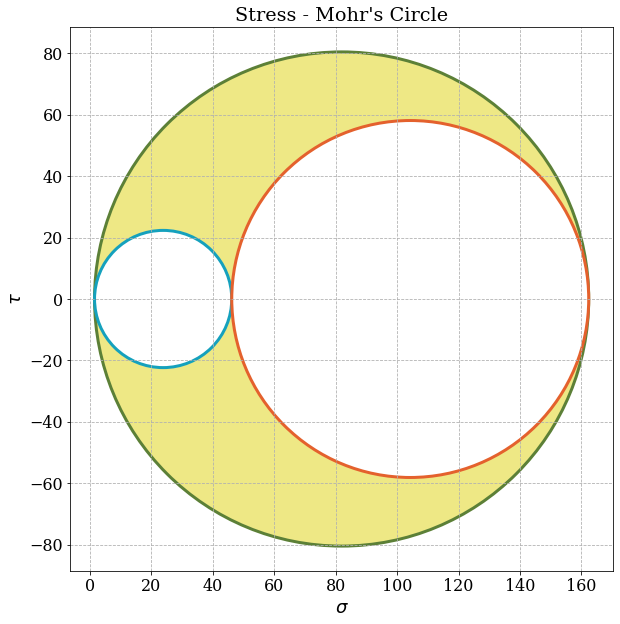

In [50]:
# vi. draw Mohr’s circle of stress and strains.

### >> Mohr’s circle for strain

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh
from matplotlib import rcParams
 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16 


def plot_stress_mohr3d(S):
    r"""Plot 3D Mohr circles."""
    S3, S2, S1 = eigvalsh(S)
    R1_maj = 0.5*(S1 - S3)
    cent1_maj = 0.5*(S1+S3)
    R1_min = 0.5*(S2 - S3)
    cent1_min = 0.5*(S2 + S3)
    R1_mid = 0.5*(S1 - S2)
    cent1_mid = 0.5*(S1 + S2)
    circ1 = plt.Circle((cent1_maj,0), R1_maj, facecolor='#eee885', lw=3, edgecolor='#5c8037')
    circ2 = plt.Circle((cent1_min,0), R1_min, facecolor='w', lw=3, edgecolor='#15a1bd')
    circ3 = plt.Circle((cent1_mid,0), R1_mid, facecolor='w', lw=3, edgecolor='#e4612d')
    plt.axis('image')
    ax = plt.gca()
    ax.add_artist(circ1)
    ax.add_artist(circ2)
    ax.add_artist(circ3)
    ax.set_xlim(S3 - .1*R1_maj, S1 + .1*R1_maj)
    ax.set_ylim(-1.1*R1_maj, 1.1*R1_maj)
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18)
    #plt.savefig('Mohr_Stress_circle_3D.svg')
    plt.show()   

plt.figure(figsize=(10, 10))
plt.grid(linestyle = '--')
plt.title("Stress - Mohr's Circle")
plot_stress_mohr3d(S)
plt.show()

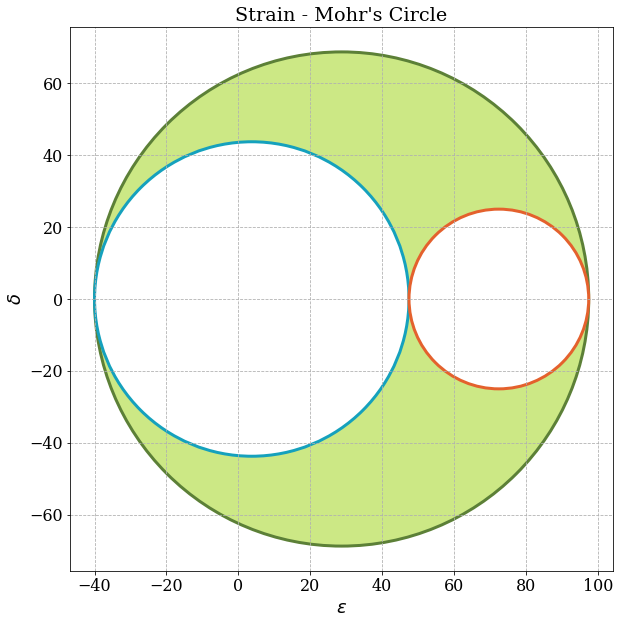

In [51]:
### >> Mohr’s circle for strains

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh
from matplotlib import rcParams
 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16 


def plot_strain_mohr3d(S):
    R2_maj = 0.5*(E1 - E3)
    cent1_maj = 0.5*(E1+E3)
    R2_min = 0.5*(E2 - E3)
    cent1_min = 0.5*(E2 + E3)
    R2_mid = 0.5*(E1 - E2)
    cent1_mid = 0.5*(E1 + E2)
    circ4 = plt.Circle((cent1_maj,0), R2_maj, facecolor='#cce885', lw=3, edgecolor='#5c8037')
    circ5 = plt.Circle((cent1_min,0), R2_min, facecolor='w', lw=3, edgecolor='#15a1bd')
    circ6 = plt.Circle((cent1_mid,0), R2_mid, facecolor='w', lw=3, edgecolor='#e4612d')
    plt.axis('image')
    ax = plt.gca()
    ax.add_artist(circ4)
    ax.add_artist(circ5)
    ax.add_artist(circ6)
    ax.set_xlim(E3 - .1*R2_maj, E1 + .1*R2_maj)
    ax.set_ylim(-1.1*R2_maj, 1.1*R2_maj)
    plt.xlabel(r"$\epsilon$", size=18)
    plt.ylabel(r"$\delta$", size=18)
    #plt.savefig('Mohr_Strain_circle_3D.svg')
    plt.show()   

plt.figure(figsize=(10, 10))
plt.grid(linestyle = '--')
plt.title("Strain - Mohr's Circle")
plot_strain_mohr3d(E)
plt.show()

In [52]:
# Modify the program developed in Problem # 1 so that it can be used
# to determine that the material has yielded or not according to 
# (i) - maximum principal stress theory, 
# (ii) - maximum shear stress theory, and 
# (iii) - maximum distortion energy theory.

print("i   - For maximum principal stress theory σ1 >= (σy or σul)")
print("ii  - For maximum principal stress theory σ1 >= τmax >= σyld")
print("iii - For maximum principal stress theory")
print("σ1 > (σ1^2 +σ2^2 +σ3^2 -σ1σ2 -σ2σ3 -σ3σ2) >= -σyld")
print()

Y = (int(input("How much is yield strength (MPA) σYP: ")))/1000
print()
print("-----------------------------------------------------------------------")
if (abs(S1) > Y):
    {print("material yielded, according to maximum principal stress theory")}
else:
    {print("material NOT yielded, according to maximum principal stress theory")}

if (tau >= (Y*2)):
    {print("material yielded, according to maximum shear stress theory")}
else:
    {print("material NOT yielded, according to maximum shear stress theory")}
    
if ((S1*S1)+(S2*S2)+(S3*S3)-(S1*S2)-(S2*S3)-(S1*S3) >= (Y*Y)):
    {print("material yielded, according to maximum distortion energy theory")}
else:
    {print("material NOT yielded, according to maximum distortion energy theory")}
print("-----------------------------------------------------------------------")

i   - For maximum principal stress theory σ1 >= (σy or σul)
ii  - For maximum principal stress theory σ1 >= τmax >= σyld
iii - For maximum principal stress theory
σ1 > (σ1^2 +σ2^2 +σ3^2 -σ1σ2 -σ2σ3 -σ3σ2) >= -σyld

How much is yield strength (MPA) σYP: 200

-----------------------------------------------------------------------
material yielded, according to maximum principal stress theory
material yielded, according to maximum shear stress theory
material yielded, according to maximum distortion energy theory
-----------------------------------------------------------------------
